# Learning Rate Failure Modes

Demonstrating how learning rate selection affects optimization behavior.

## Objective

Observe how different learning rates impact Gradient Descent behavior
over the same loss surface and data-generating process.

The goal is diagnosis, not correction.

## Scope

This notebook focuses on:
* Learning rate as a stability control
* Convergence, oscillation, and divergence
* Behavioral diagnostics via loss trajectories

## Out of scope

This notebook explicitly excludes:
* Learning rate tuning strategies
* Adaptive optimizers
* Early stopping
* Regularization

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

## Data-generating process

The same dataset and loss function are reused to isolate
the effect of the learning rate from other factors.

In [3]:
X = np.linspace(0, 10, 50)
y = 3.0 * X + 5.0 + np.random.normal(0, 2, size=len(X))

In [4]:
def mse_loss(w, b, X, y):
    y_pred = w * X + b
    return np.mean((y - y_pred) ** 2)

def mse_gradients(w, b, X, y):
    y_pred = w * X + b
    dw = -2 * np.mean(X * (y - y_pred))
    db = -2 * np.mean(y - y_pred)
    return dw, db

## Experiment setup

Three learning rates are tested:
* Low: stable but slow
* Moderate: stable and efficient
* High: unstable behavior

All other factors remain fixed.

In [5]:
learning_rates = {
    "low": 0.001,
    "moderate": 0.01,
    "high": 0.1,
}

n_iterations = 100

In [6]:
results = {}

for label, lr in learning_rates.items():
    w, b = 0.0, 0.0
    loss_history = []

    for _ in range(n_iterations):
        dw, db = mse_gradients(w, b, X, y)
        w -= lr * dw
        b -= lr * db
        loss_history.append(mse_loss(w, b, X, y))

    results[label] = loss_history

## Loss trajectories

Loss curves reveal stability characteristics directly.

Loss is plotted on a logarithmic scale to accommodate
orders-of-magnitude differences between stable and unstable regimes.

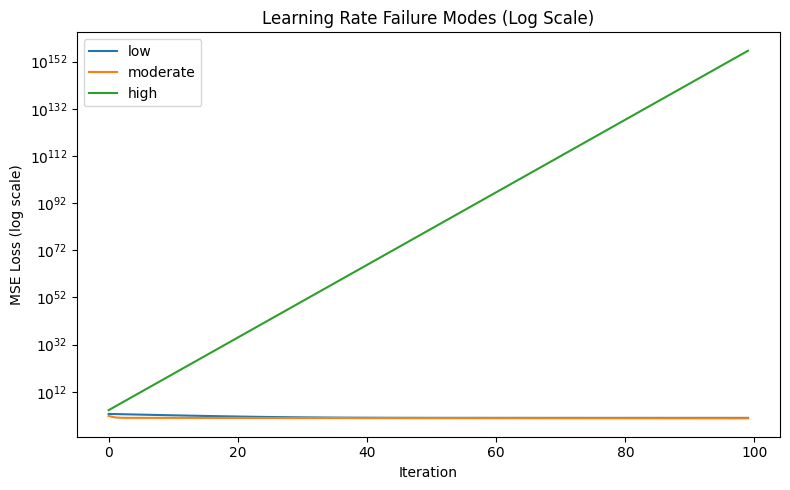

In [14]:
plt.figure(figsize=(8, 5))

for label, losses in results.items():
    plt.plot(losses, label=label)

plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss (log scale)")
plt.title("Learning Rate Failure Modes (Log Scale)")
plt.legend()
plt.tight_layout()
plt.show()

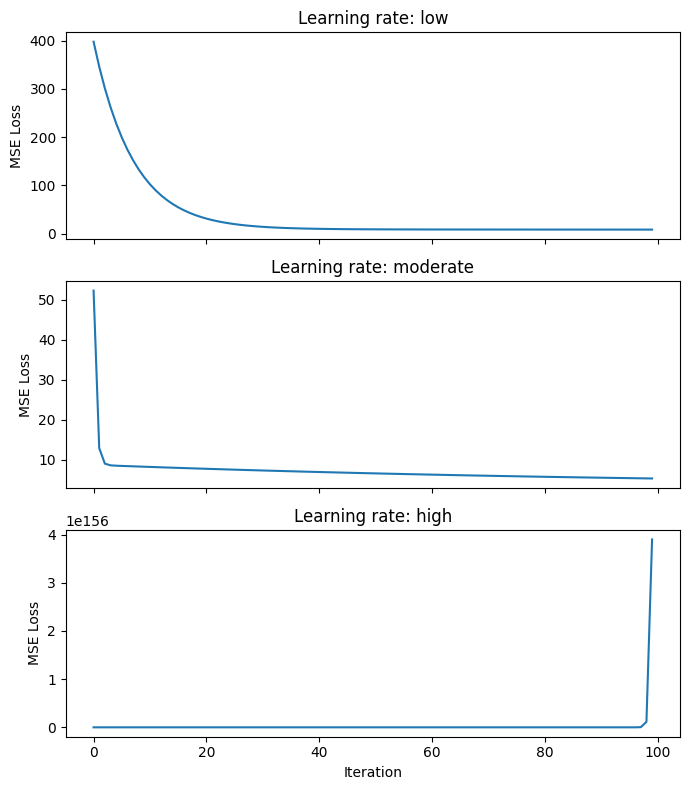

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(7, 8), sharex=True)

for ax, (label, losses) in zip(axes, results.items()):
    ax.plot(losses)
    ax.set_title(f"Learning rate: {label}")
    ax.set_ylabel("MSE Loss")

axes[-1].set_xlabel("Iteration")
plt.tight_layout()
plt.show()

## Interpretation

Low learning rates produce stable but slow convergence.
Moderate learning rates balance stability and speed.
High learning rates lead to oscillation or divergence.

These behaviors are properties of the update dynamics,
not of the model or the data.

## Engineering diagnosis

Learning rate is a stability parameter.

When optimization fails:
* The loss curve is the first diagnostic tool
* Behavior must be classified before intervention
* Hyperparameter changes without diagnosis are blind fixes

## Takeaway

Learning rate selection controls numerical stability.

Optimization issues should be understood as system behavior,
not as tuning problems.